<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h3>Objective for this Notebook<h3>    
<h5> 1. Learn about Convolution.</h5>
<h5> 2. Leran Determining  the Size of Output. </h5>
<h5> 3. Learn Stride, Zero Padding</h5>   


# Table of Contents

In this lab, you will study convolution and review how the different operations change the relationship between input and output.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">What is Convolution  </a></li>

<li><a href="#ref1">Determining  the Size of Output</a></li>
<li><a href="#ref2">Stride</a></li>
<li><a href="#ref3">Zero Padding </a></li>
<li><a href="#ref4">Practice Questions </a></li>

<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>


Import the following libraries: 


In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

<a id="ref0"></a>

<h2 align=center>What is Convolution?</h2>


Convolution is a linear operation similar to a linear equation, dot product, or matrix multiplication. Convolution has several advantages for analyzing images. As discussed in the video, convolution preserves the relationship between elements, and it requires fewer parameters than other methods.  


You can see the relationship between the different methods that you learned:

$$linear \ equation :y=wx+b$$
$$linear\ equation\ with\ multiple \ variables \ where \ \mathbf{x} \ is \ a \ vector \ \mathbf{y}=\mathbf{wx}+b$$
$$ \ matrix\ multiplication \ where \ \mathbf{X} \ in \ a \ matrix \ \mathbf{y}=\mathbf{wX}+\mathbf{b} $$
$$\ convolution \ where \ \mathbf{X} \ and \ \mathbf{Y} \ is \ a \ tensor \  \mathbf{Y}=\mathbf{w}*\mathbf{X}+\mathbf{b}$$


In convolution, the parameter <b>w</b> is called a kernel. You can perform convolution on images where you let the variable image denote the variable X and w denote the parameter.


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1xw.png" width = 500, align = "center">


Create a two-dimensional convolution object by using the constructor Conv2d, the parameter <code>in_channels</code> and <code>out_channels</code> will be used for this section, and the parameter kernel_size will be three.


In [2]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

Because the parameters in <code>nn.Conv2d</code> are randomly initialized and learned through training, give them some values.


In [3]:
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[-0.2591, -0.3024,  0.0311],
                        [ 0.1479, -0.2372,  0.2831],
                        [ 0.1049, -0.1624, -0.2603]]]])),
             ('bias', tensor([-0.1463]))])

In [5]:
conv.state_dict()['weight'][0][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

Create a dummy tensor to represent an image. The shape of the image is (1,1,5,5) where:

(number of inputs, number of channels, number of rows, number of columns ) 

Set the third column to 1:


(tensor([[[[0., 0., 1., 0., 0.],
           [0., 0., 1., 0., 0.],
           [0., 0., 1., 0., 0.],
           [0., 0., 1., 0., 0.],
           [0., 0., 1., 0., 0.]]]]),
 <matplotlib.image.AxesImage at 0x7f71efd76d60>)

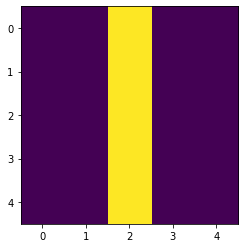

In [12]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image, plt.imshow(image[0][0])

Call the object <code>conv</code> on the tensor <code>image</code> as an input to perform the convolution and assign the result to the tensor <code>z</code>. 


(tensor([[[[-4.,  0.,  4.],
           [-4.,  0.,  4.],
           [-4.,  0.,  4.]]]], grad_fn=<ThnnConv2DBackward>),
 <matplotlib.image.AxesImage at 0x7f71ec0a8190>)

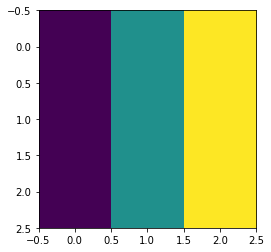

In [23]:
z=conv(image)
z, plt.imshow(z.detach().numpy()[0][0])

The following animation illustrates the process, the kernel performs at the element-level multiplication on every element in the image in the corresponding region. The values are then added together. The kernel is then shifted and the process is repeated. 


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1convltuon.gif" width = 500, align = "center">


<a id="ref1"></a>

<h2 align=center>Determining  the Size of the Output</h2>


The size of the output is an important parameter. In this lab, you will assume square images. For rectangular images, the same formula can be used in for each dimension independently.  

Let M be the size of the input and K be the size of the kernel. The size of the output is given by the following formula:


$$M_{new}=M-K+1$$


Create a kernel of size 2:


In [6]:
K=2
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=K)
conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
conv1.state_dict()
conv1

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))

Create an image of size 2:


In [7]:
M=4
image1=torch.ones(1,1,M,M)

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1kernal2.png" width = 500, align = "center">


The following equation provides the output:


$$M_{new}=M-K+1$$
$$M_{new}=4-2+1$$
$$M_{new}=3$$


The following animation illustrates the process: The first iteration of the kernel overlay of the images produces one output. As the kernel is of size K, there are M-K  elements for the kernel to move in the horizontal direction. The same logic applies to the vertical direction.  


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1outsize.gif" width = 500, align = "center">


Perform the convolution and verify the size is correct:


In [8]:
z1=conv1(image1)
print("z1:",z1)
print("shape:",z1.shape[2:4])

z1: tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ThnnConv2DBackward>)
shape: torch.Size([3, 3])


<a id="ref2"></a>

<h2 align=center>Stride parameter</h2>


The parameter stride changes the number of shifts the kernel moves per iteration. As a result, the output size also changes and is given by the following formula:


$$M_{new}=\dfrac{M-K}{stride}+1$$


Create a convolution object with a stride of 2:


In [9]:
conv3 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv3.state_dict()['bias'][0]=0.0
conv3.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

For an image with a size of 4, calculate the output size:


$$M_{new}=\dfrac{M-K}{stride}+1$$
$$M_{new}=\dfrac{4-2}{2}+1$$
$$M_{new}=2$$


The following animation illustrates the process: The first iteration of the kernel overlay of the images produces one output. Because the kernel is of size K, there are M-K=2 elements. The stride is 2 because it will move 2 elements at a time. As a result, you divide M-K by the stride value 2:


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1stride2.gif" width = 500, align = "center">


Perform the convolution and verify the size is correct: 


In [10]:
z3=conv3(image1)

print("z3:",z3)
print("shape:",z3.shape[2:4])

z3: tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ThnnConv2DBackward>)
shape: torch.Size([2, 2])


<a id='ref3'></a>

<h2 align=center>Zero Padding </h2>


As you apply successive convolutions, the image will shrink. You can apply zero padding to keep the image at a reasonable size, which also holds information at the borders.


In addition, you might not get integer values for the size of the kernel. Consider the following image:


In [11]:
image1

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

Try performing convolutions with the <code>kernel_size=2</code> and a <code>stride=3</code>. Use these values:

$$M_{new}=\dfrac{M-K}{stride}+1$$
$$M_{new}=\dfrac{4-2}{3}+1$$
$$M_{new}=1.666$$


In [12]:
conv4 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv4.state_dict()['bias'][0]=0.0
conv4.state_dict()
z4=conv4(image1)
print("z4:",z4)
print("z4:",z4.shape[2:4])

z4: tensor([[[[4.]]]], grad_fn=<ThnnConv2DBackward>)
z4: torch.Size([1, 1])


You can add rows and columns of zeros around the image. This is called padding. In the constructor <code>Conv2d</code>, you specify the number of rows or columns of zeros that you want to add with the parameter padding. 

For a square image, you merely pad an extra column of zeros to the first column and the last column. Repeat the process for the rows. As a result, for a square image, the width and height is the original size plus 2 x the number of padding elements specified. You can then determine the size of the output after subsequent operations accordingly as shown in the following equation where you determine the size of an image after padding and then applying a convolutions kernel of size K.


$$M'=M+2 \times padding$$
$$M_{new}=M'-K+1$$


Consider the following example:


In [13]:
conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

conv5.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv5.state_dict()['bias'][0]=0.0
conv5.state_dict()
z5=conv5(image1)
print("z5:",z5)
print("z5:",z4.shape[2:4])

z5: tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ThnnConv2DBackward>)
z5: torch.Size([1, 1])


The process is summarized in the following  animation: 


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1zeropad.gif" width = 500, align = "center">


<a id='ref4'></a>

<h2 align=center>Practice Question </h2>


 A kernel of zeros with a kernel size=3  is applied to the following image: 


In [14]:
Image=torch.randn((1,1,4,4))
Image

tensor([[[[ 1.5741e-01, -3.0949e-01,  1.2544e+00,  3.3910e-01],
          [ 1.1580e+00, -1.4038e+00, -3.9315e-01,  6.0181e-01],
          [-6.0313e-01, -2.3338e-01,  1.0801e-03, -1.4879e+00],
          [ 1.3758e+00, -5.7607e-01,  2.2295e+00,  3.7108e-01]]]])

Question: Without using the function, determine what the outputs values are as each element:


Double-click **here** for the solution.

<!-- Your answer is below:
As each element of the kernel is zero, and for every  output, the image is multiplied  by the  kernel, the result is always zero 

-->


Question: Use the following convolution object to perform convolution on the tensor   <code>Image</code>:


In [16]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv.state_dict()['weight'][0][0]=torch.tensor([[0,0,0],[0,0,0],[0,0.0,0]])
conv.state_dict()['bias'][0]=0.0
conv(Image)

tensor([[[[0., 0.],
          [0., 0.]]]], grad_fn=<ThnnConv2DBackward>)

Double-click **here** for the solution.

<!-- Your answer is below:
conv(Image)
-->


Question: You have an image of size 4. The parameters are as follows  kernel_size=2,stride=2. What is the size of the output?


In [17]:
# Given M = 4, K = 2, stride = 2, the size of the output is equal to = ((M - K) / stride) + 1 == 2 

Double-click **here** for the solution.

<!-- Your answer is below:
(M-K)/stride +1
(4-2)/2 +1
2
-->
